In [2]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import cv2 as cv
from cv2.data import haarcascades
import matplotlib.pyplot as plt

In [3]:
# Create a function to display 5 images
def display_images(images, titles):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

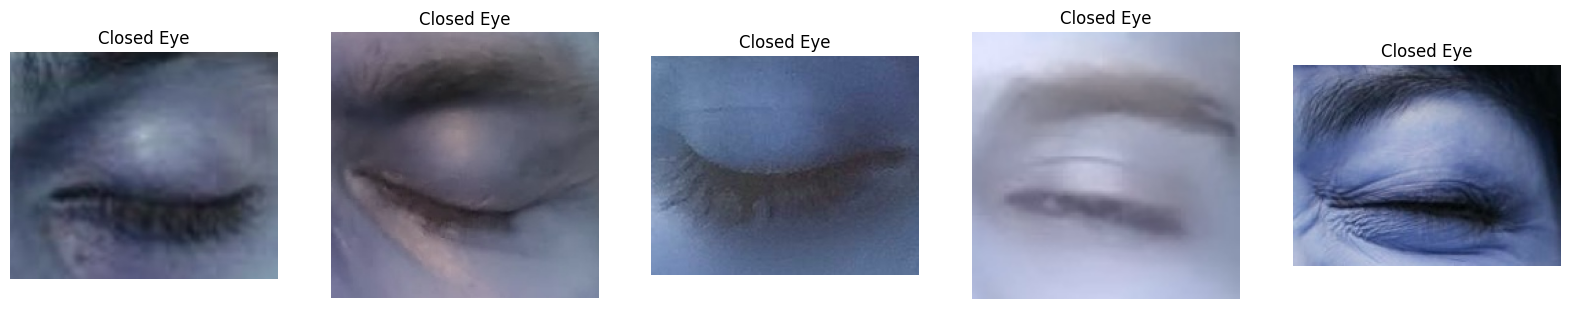

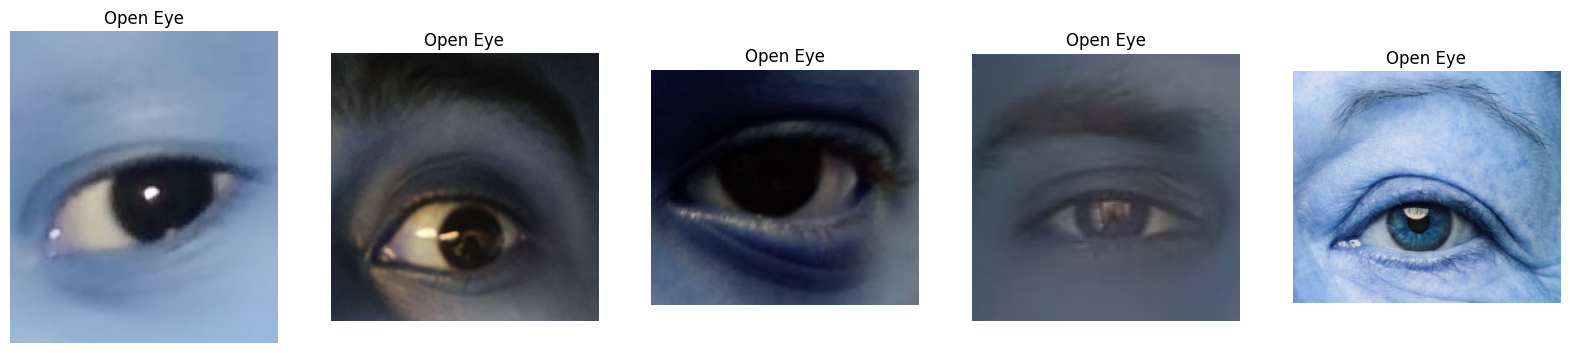

In [4]:
closed_eyes = []
open_eyes = []

# Load the images and labels
for im in os.listdir('data/dataset/Closed'):
    img = cv.imread('data/dataset/Closed/' + im)
    closed_eyes.append(img)

for im in os.listdir('data/dataset/Open'):
    img = cv.imread('data/dataset/Open/' + im)
    open_eyes.append(img)

# Display the first 5 images
display_images(closed_eyes[:5], ['Closed Eye']*5)
display_images(open_eyes[:5], ['Open Eye']*5)

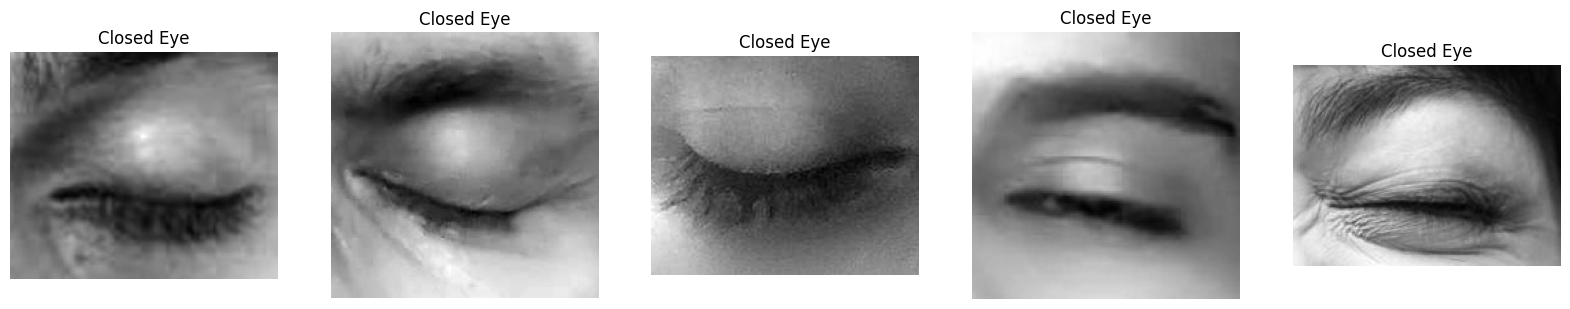

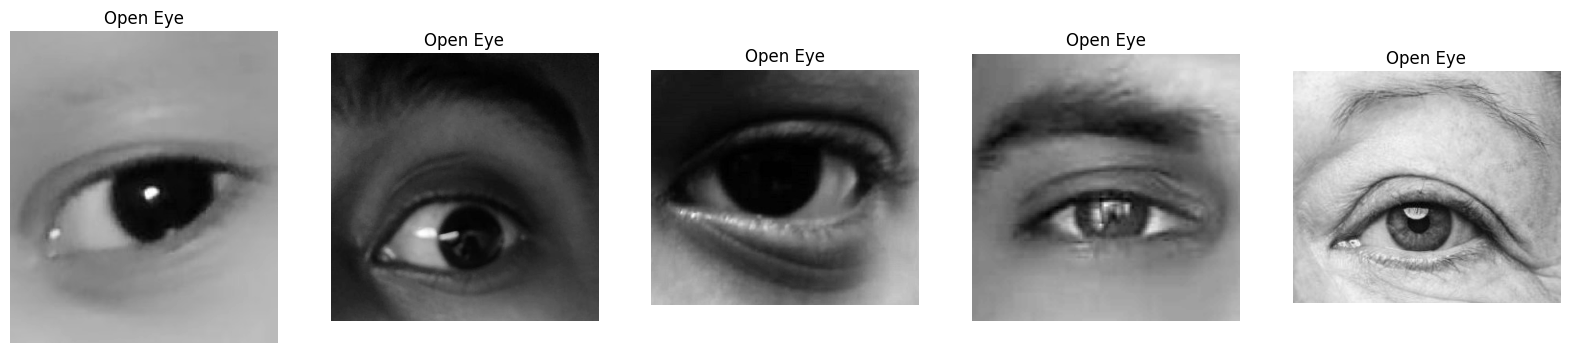

In [5]:
# convert all images to grayscale
closed_eyes_gray = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in closed_eyes]
open_eyes_gray = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in open_eyes]

# Display the first 5 grayscale images
display_images(closed_eyes_gray[:5], ['Closed Eye']*5)
display_images(open_eyes_gray[:5], ['Open Eye']*5)

In [6]:
min_size = min([img.shape[0] for img in closed_eyes_gray + open_eyes_gray])
max_size = max([img.shape[0] for img in closed_eyes_gray + open_eyes_gray])
print('Minimum image size:', min_size)
print('Maximum image size:', max_size)

Minimum image size: 40
Maximum image size: 1625


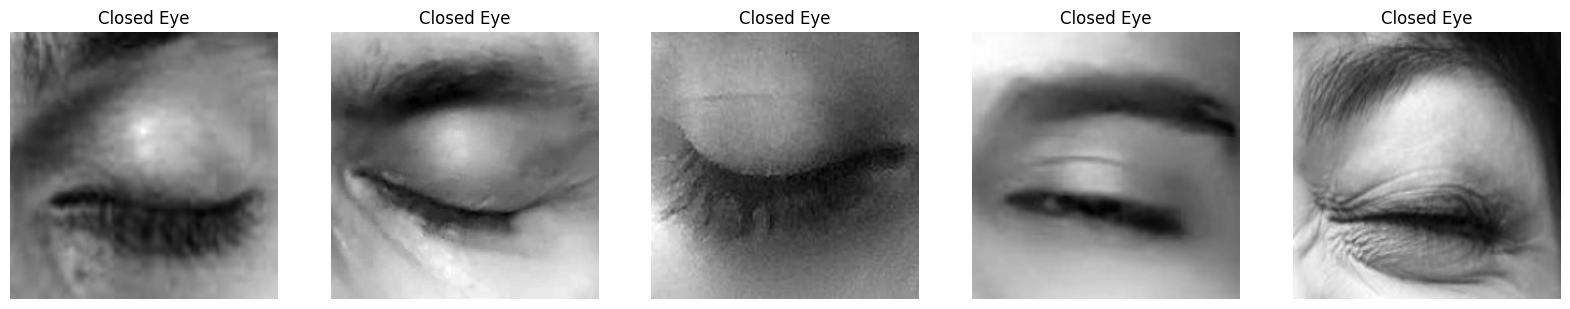

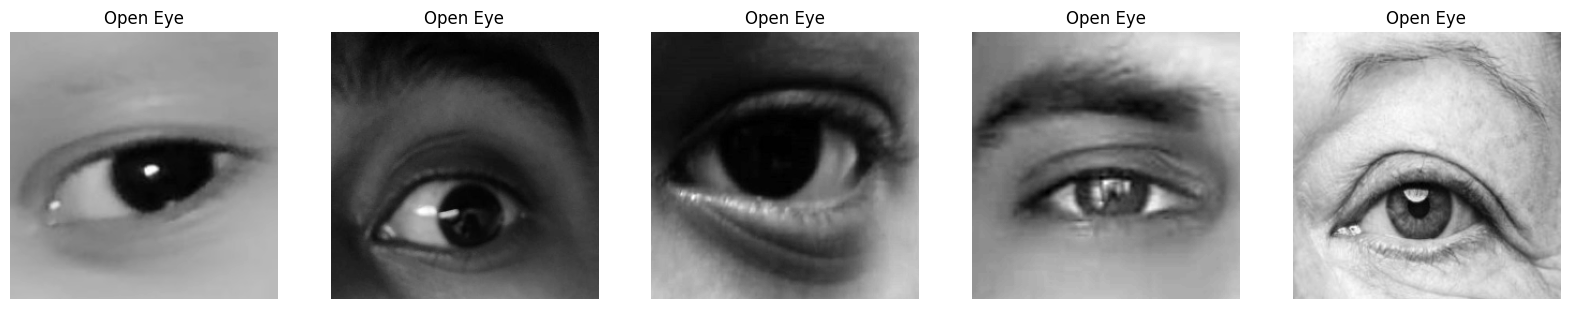

In [7]:
# Resize all images to 250x250
closed_eyes_resized = [cv.resize(img, (250, 250)) for img in closed_eyes_gray]
open_eyes_resized = [cv.resize(img, (250, 250)) for img in open_eyes_gray]

# Display the first 5 resized images
display_images(closed_eyes_resized[:5], ['Closed Eye']*5)
display_images(open_eyes_resized[:5], ['Open Eye']*5)


Text(0.5, 1.0, 'Label: 1')

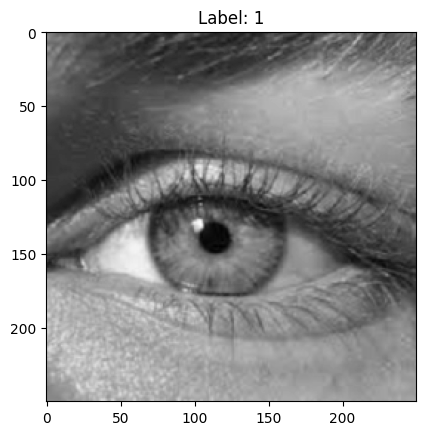

In [8]:
from sklearn.utils import shuffle


combined_images = closed_eyes_resized + open_eyes_resized
labels = [0]*len(closed_eyes_resized) + [1]*len(open_eyes_resized)

# Convert the images and labels to numpy arrays
X = np.array(combined_images)
y = np.array(labels)

X, y = shuffle(X, y, random_state=42)
X, y

# Show the 53 image and its label
plt.imshow(X[104], cmap='gray')
plt.title('Label: ' + str(y[104]))

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255
X_test = X_test / 255

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# tell model to stop training when the validation loss is not decreasing
from tensorflow.keras.callbacks import EarlyStopping

# Create a convolutional neural network
layers = [
    Conv2D(32, (3, 3), input_shape=(250, 250, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]

model = Sequential(layers)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=4)], random_state=42)

y_pred = model.predict(X_test)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 555ms/step - accuracy: 0.6346 - loss: 1.1239 - val_accuracy: 0.8694 - val_loss: 0.3007
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 541ms/step - accuracy: 0.8932 - loss: 0.2914 - val_accuracy: 0.8866 - val_loss: 0.3126
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 562ms/step - accuracy: 0.9214 - loss: 0.2119 - val_accuracy: 0.8797 - val_loss: 0.3265
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 564ms/step - accuracy: 0.9227 - loss: 0.2105 - val_accuracy: 0.9278 - val_loss: 0.2367
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 559ms/step - accuracy: 0.9398 - loss: 0.2324 - val_accuracy: 0.9072 - val_loss: 0.2290
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 520ms/step - accuracy: 0.9534 - loss: 0.1388 - val_accuracy: 0.8866 - val_loss: 0.2481
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 560ms/step - accuracy: 0.9673 - loss: 0.1066 - val_accuracy: 0.8900 - val_loss: 0.2352
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.9747 - loss: 0.0828 - 

In [23]:
model.save('models/CNN_eye_normal.keras')

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert the probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       158
           1       0.92      0.94      0.93       133

    accuracy                           0.93       291
   macro avg       0.93      0.94      0.93       291
weighted avg       0.94      0.93      0.93       291

[[147  11]
 [  8 125]]
